# Lecture 2: Sorting

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

## Insertion Sort

This implements the most naive version of insertion sort, following the logic: "insert the thing where it needs to go."  

It makes a blank list, and inserts elements one-at-a-time.

This is not a very good way to implement insertion sort.

In [2]:
def naiveInsertionSort(A):
    B = [None for i in range(len(A))] # B is a blank list of the same length as A
    for x in A:
        for i in range(len(B)):
            if B[i] == None or B[i] > x:
                # then x goes in spot i, and we should move everything over.
                j = len(B)-1
                while j > i:
                    B[j] = B[j-1]
                    j -= 1
                B[i] = x
                break # okay we are done placing x
    return B

Let's sanity-check:

In [3]:
A = [6,4,3,8,5]
B = naiveInsertionSort(A)
print(B)

[3, 4, 5, 6, 8]


The code above faithfully captures the notion of "insertion sort" that we first described on the slides: insert the elements into a new list, one-at-a-time, where they should go.  But we can be a bit more slick about it, and do it in-place.  The following  implements the description of insertion sort in-place, which we gave a demonstration of in the slides.

In [4]:
def InsertionSort(A):
    for i in range(1,len(A)):
        current = A[i]
        j = i-1
        while j >= 0 and A[j] > current:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = current

Let's sanity-check:

In [5]:
A = [6,4,3,8,5]
InsertionSort(A)
print(A)

[3, 4, 5, 6, 8]


Let's do it a bunch more times to make sure!  (Note: this is *not* a formal proof of correctness!)

In [6]:
def is_sorted(A):
    for i in range(len(A) - 1):
        if A[i] > A[i+1]:
            return False
    return True

A = [1,2,3,4,5,6,7,8,9,10]
for trial in range(100):
    shuffle(A)
    InsertionSort(A)
    if is_sorted(A):
        print('YES IT IS SORTED!')

YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS 

Okay, now we have two working algorithms.  Which one is faster?

In [7]:
from tryItABunch import tryItABunch
nValuesNaive, tValuesNaive = tryItABunch( naiveInsertionSort, startN = 50, endN = 1050, stepSize=50, numTrials=10, listMax = 10 )
nValues, tValues = tryItABunch( InsertionSort, startN = 50, endN = 1050, stepSize=50, numTrials=5, listMax = 10) 

Text(0.5, 1.0, 'Naive vs. non-naive insertion sort')

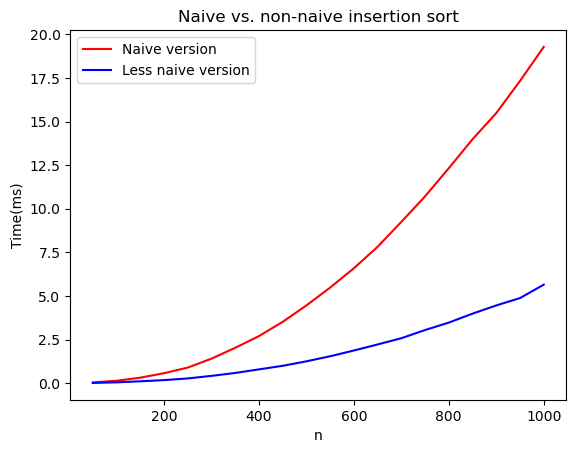

In [8]:
plt.plot(nValuesNaive, tValuesNaive, color="red", label="Naive version")
plt.plot(nValues, tValues, color="blue", label="Less naive version")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Naive vs. non-naive insertion sort")


Well, that does agree with our intuition that the naive version should take longer.  But it looks like the performance is getting worse and worse!  Instead of growing roughly linearly with the size of the input, it's growing quadratically!

## MergeSort

Okay, so InsertionSort was slow.  Can we do better?

In [9]:
# merge two sorted arrays to return a sorted array
def merge(L, R):
    i = 0 # current index in the L array
    j = 0 # current index in the R array
    ret = []
    while i < len(L) and j < len(R):
        if L[i] < R[j]:
            ret.append(L[i])
            i += 1
        else:   # ties go to R.  Doesn't really matter.
            ret.append(R[j])
            j += 1
    while i < len(L):
        ret.append(L[i])
        i += 1
    while j < len(R):
        ret.append(R[j])
        j+= 1
    return ret
        
def mergeSort(A):
    n = len(A)
    if n <= 1:
        return A
    L = mergeSort(A[:round(n/2)])
    R = mergeSort(A[round(n/2):n])
    return merge(L,R)

Let's sanity-check:

In [10]:
A = [27,17,2,4,52,3,4,3]
B = mergeSort(A)
print(B)

[2, 3, 3, 4, 4, 17, 27, 52]


In [11]:
nValuesMerge, tValuesMerge = tryItABunch( mergeSort, startN = 50, endN = 1050, stepSize=50, numTrials=10, listMax = 10)

First we can take a look at how that fits in with what we saw before

Text(0.5, 1.0, 'All sorts of sorts')

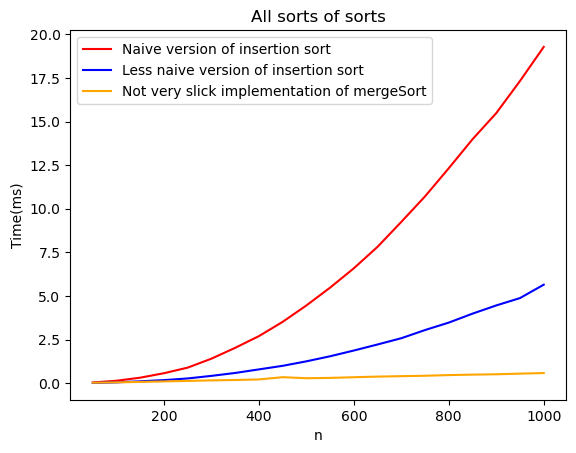

In [12]:
plt.plot(nValuesNaive, tValuesNaive, color="red", label="Naive version of insertion sort")
plt.plot(nValues, tValues, color="blue", label="Less naive version of insertion sort")
plt.plot(nValuesMerge, tValuesMerge, color="orange", label="Not very slick implementation of mergeSort")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("All sorts of sorts")

For reference, this is how the theoretical running time looks:

Text(0.5, 1.0, 'n^2 vs nlog(n)')

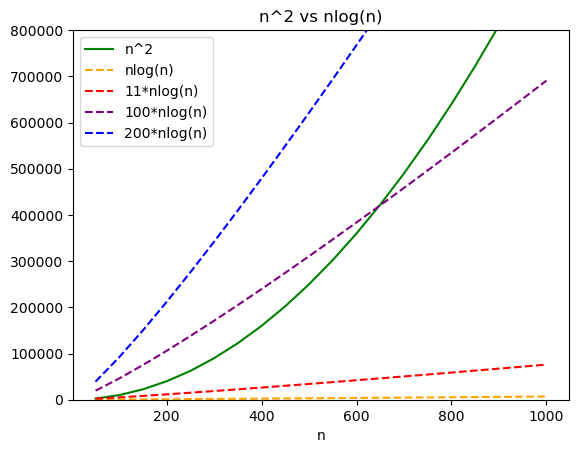

In [13]:
plt.plot(nValuesMerge, [x**2 for x in nValuesMerge], color="green", label="n^2")
plt.plot(nValuesMerge, [x*np.log(x) for x in nValuesMerge], "--", color="orange", label="nlog(n)")
plt.plot(nValuesMerge, [11*x*np.log(x) for x in nValuesMerge], "--", color="red", label="11*nlog(n)")
plt.plot(nValuesMerge, [100*x*np.log(x) for x in nValuesMerge], "--", color="purple", label="100*nlog(n)")
plt.plot(nValuesMerge, [200*x*np.log(x) for x in nValuesMerge], "--", color="blue", label="200*nlog(n)")
plt.xlabel("n")
plt.ylim(0,800000)
plt.legend()
plt.title("n^2 vs nlog(n)")